# Figure 2: Single molecule examples

Demonstrate umap of cells on factors.

In [3]:
import sys
sys.path.append('code')  

from DeepLearningChromatinStructure_code import *  # Rajpurkar et al. ORCA processing code 
from plot import *                                 # Plotting functions for 2D and 3D data
from utils import *                                # Util functions for 2D and 3D data
from ChromaFactor import *                         # ChromaFactor

In [18]:
import umap
import matplotlib as mpl
import seaborn as sns


## Read in data and process

In [4]:
# data can be found here: https://zenodo.org/records/4741214

orca_dir = "/srv/home/lgunsalus/data/orca/"
dna_file = orca_dir + "dnaData_exp1.csv"
rna_file = orca_dir + "rnaData_exp1.csv"

In [5]:
xyzdat, rnadat = read_data(dna_file, rna_file) # read in data
xyzdat = fill_in_missing(xyzdat)               # fill in missing points with nas
xyzfilt, rnafilt = filter_dat(xyzdat, rnadat, req_xyz_perc = 0.2, interpol=True, norm = False, bool_thresh = 1)

In [6]:
all_maps = np.asarray([get_distance_matrix(single_map) for single_map in xyzfilt])
normalized = (all_maps-np.min(all_maps))/(np.max(all_maps)-np.min(all_maps))
median_distance_map_combined = np.nanmedian(normalized, axis = 0)
contact_th = 500
contact_map_combined = np.sum(all_maps<contact_th, axis=0) / np.sum(np.isnan(all_maps)==False, axis=0)

## Run

In [8]:
# Run ChromaFactor
chroma_factor = ChromaFactor(normalized)

# Reconstruct maps
new_maps = chroma_factor.reconstruct_maps()

# Measure reconstruction error
print(f"Reconstruction Error: {chroma_factor.reconstruction_err}")

Reconstruction Error: 34.12658433643243


# Plot

In [9]:
data = chroma_factor.components.T
componentsF = pd.DataFrame(data)
componentsF['primary_component'] = componentsF.idxmax(axis=1)

In [22]:
components = chroma_factor.components

## Plot median of closest component

### Component 0

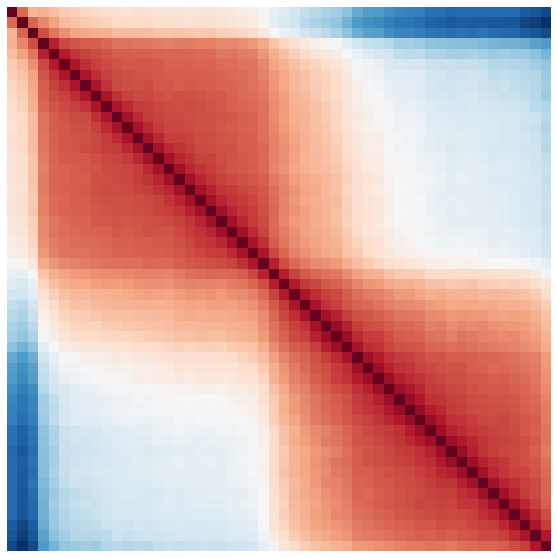

(2007, 52, 52)


In [12]:
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.top'] = True

cur_component = 0
component_mask = componentsF['primary_component'] == cur_component
component_maps = all_maps[component_mask]
component_maps_reshape = np.asarray([get_distance_matrix(single_map) for single_map in component_maps])
component_median = np.nanmedian(component_maps_reshape, axis = 0)
plot_distance_matrix(component_median, cmap_order='forward',hide_all=True, ax_label=None)
print(component_maps_reshape.shape)

### Component 1

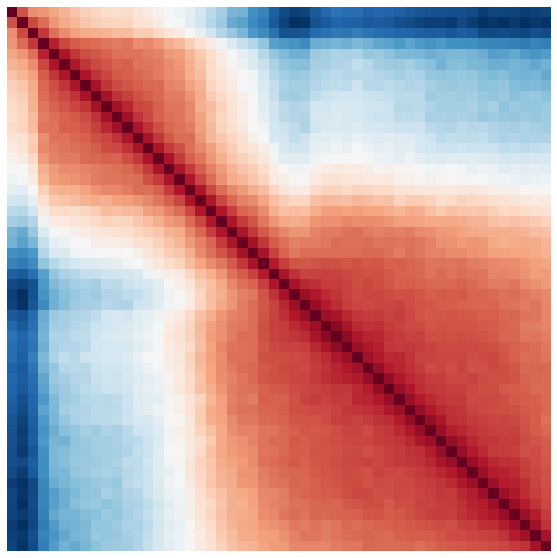

(579, 52, 52)


In [13]:
cur_component = 1
component_mask = componentsF['primary_component'] == cur_component
component_maps = all_maps[component_mask]
component_maps_reshape = np.asarray([get_distance_matrix(single_map) for single_map in component_maps])
component_median = np.nanmedian(component_maps_reshape, axis = 0)
plot_distance_matrix(component_median, cmap_order='forward',hide_all=True, ax_label=None)
print(component_maps_reshape.shape)

### Component 5

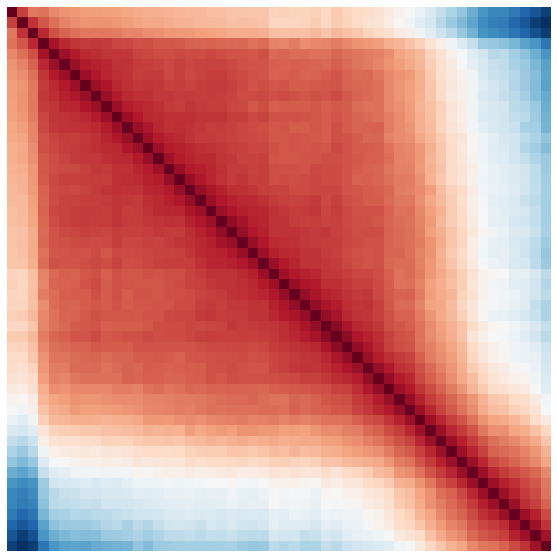

(615, 52, 52)


In [14]:
cur_component = 5
component_mask = componentsF['primary_component'] == cur_component
component_maps = all_maps[component_mask]
component_maps_reshape = np.asarray([get_distance_matrix(single_map) for single_map in component_maps])
component_median = np.nanmedian(component_maps_reshape, axis = 0)
plot_distance_matrix(component_median, cmap_order='forward',hide_all=True, ax_label=None)
print(component_maps_reshape.shape)

## UMAP

In [15]:
fit = umap.UMAP(n_neighbors=5, random_state=42, metric='euclidean')
%time u = fit.fit_transform(data)

CPU times: user 36 s, sys: 33.6 s, total: 1min 9s
Wall time: 21.9 s


In [16]:
umap_out = pd.DataFrame(u, columns=['umap1', 'umap2'])
umap_out['primary_component'] = componentsF['primary_component']

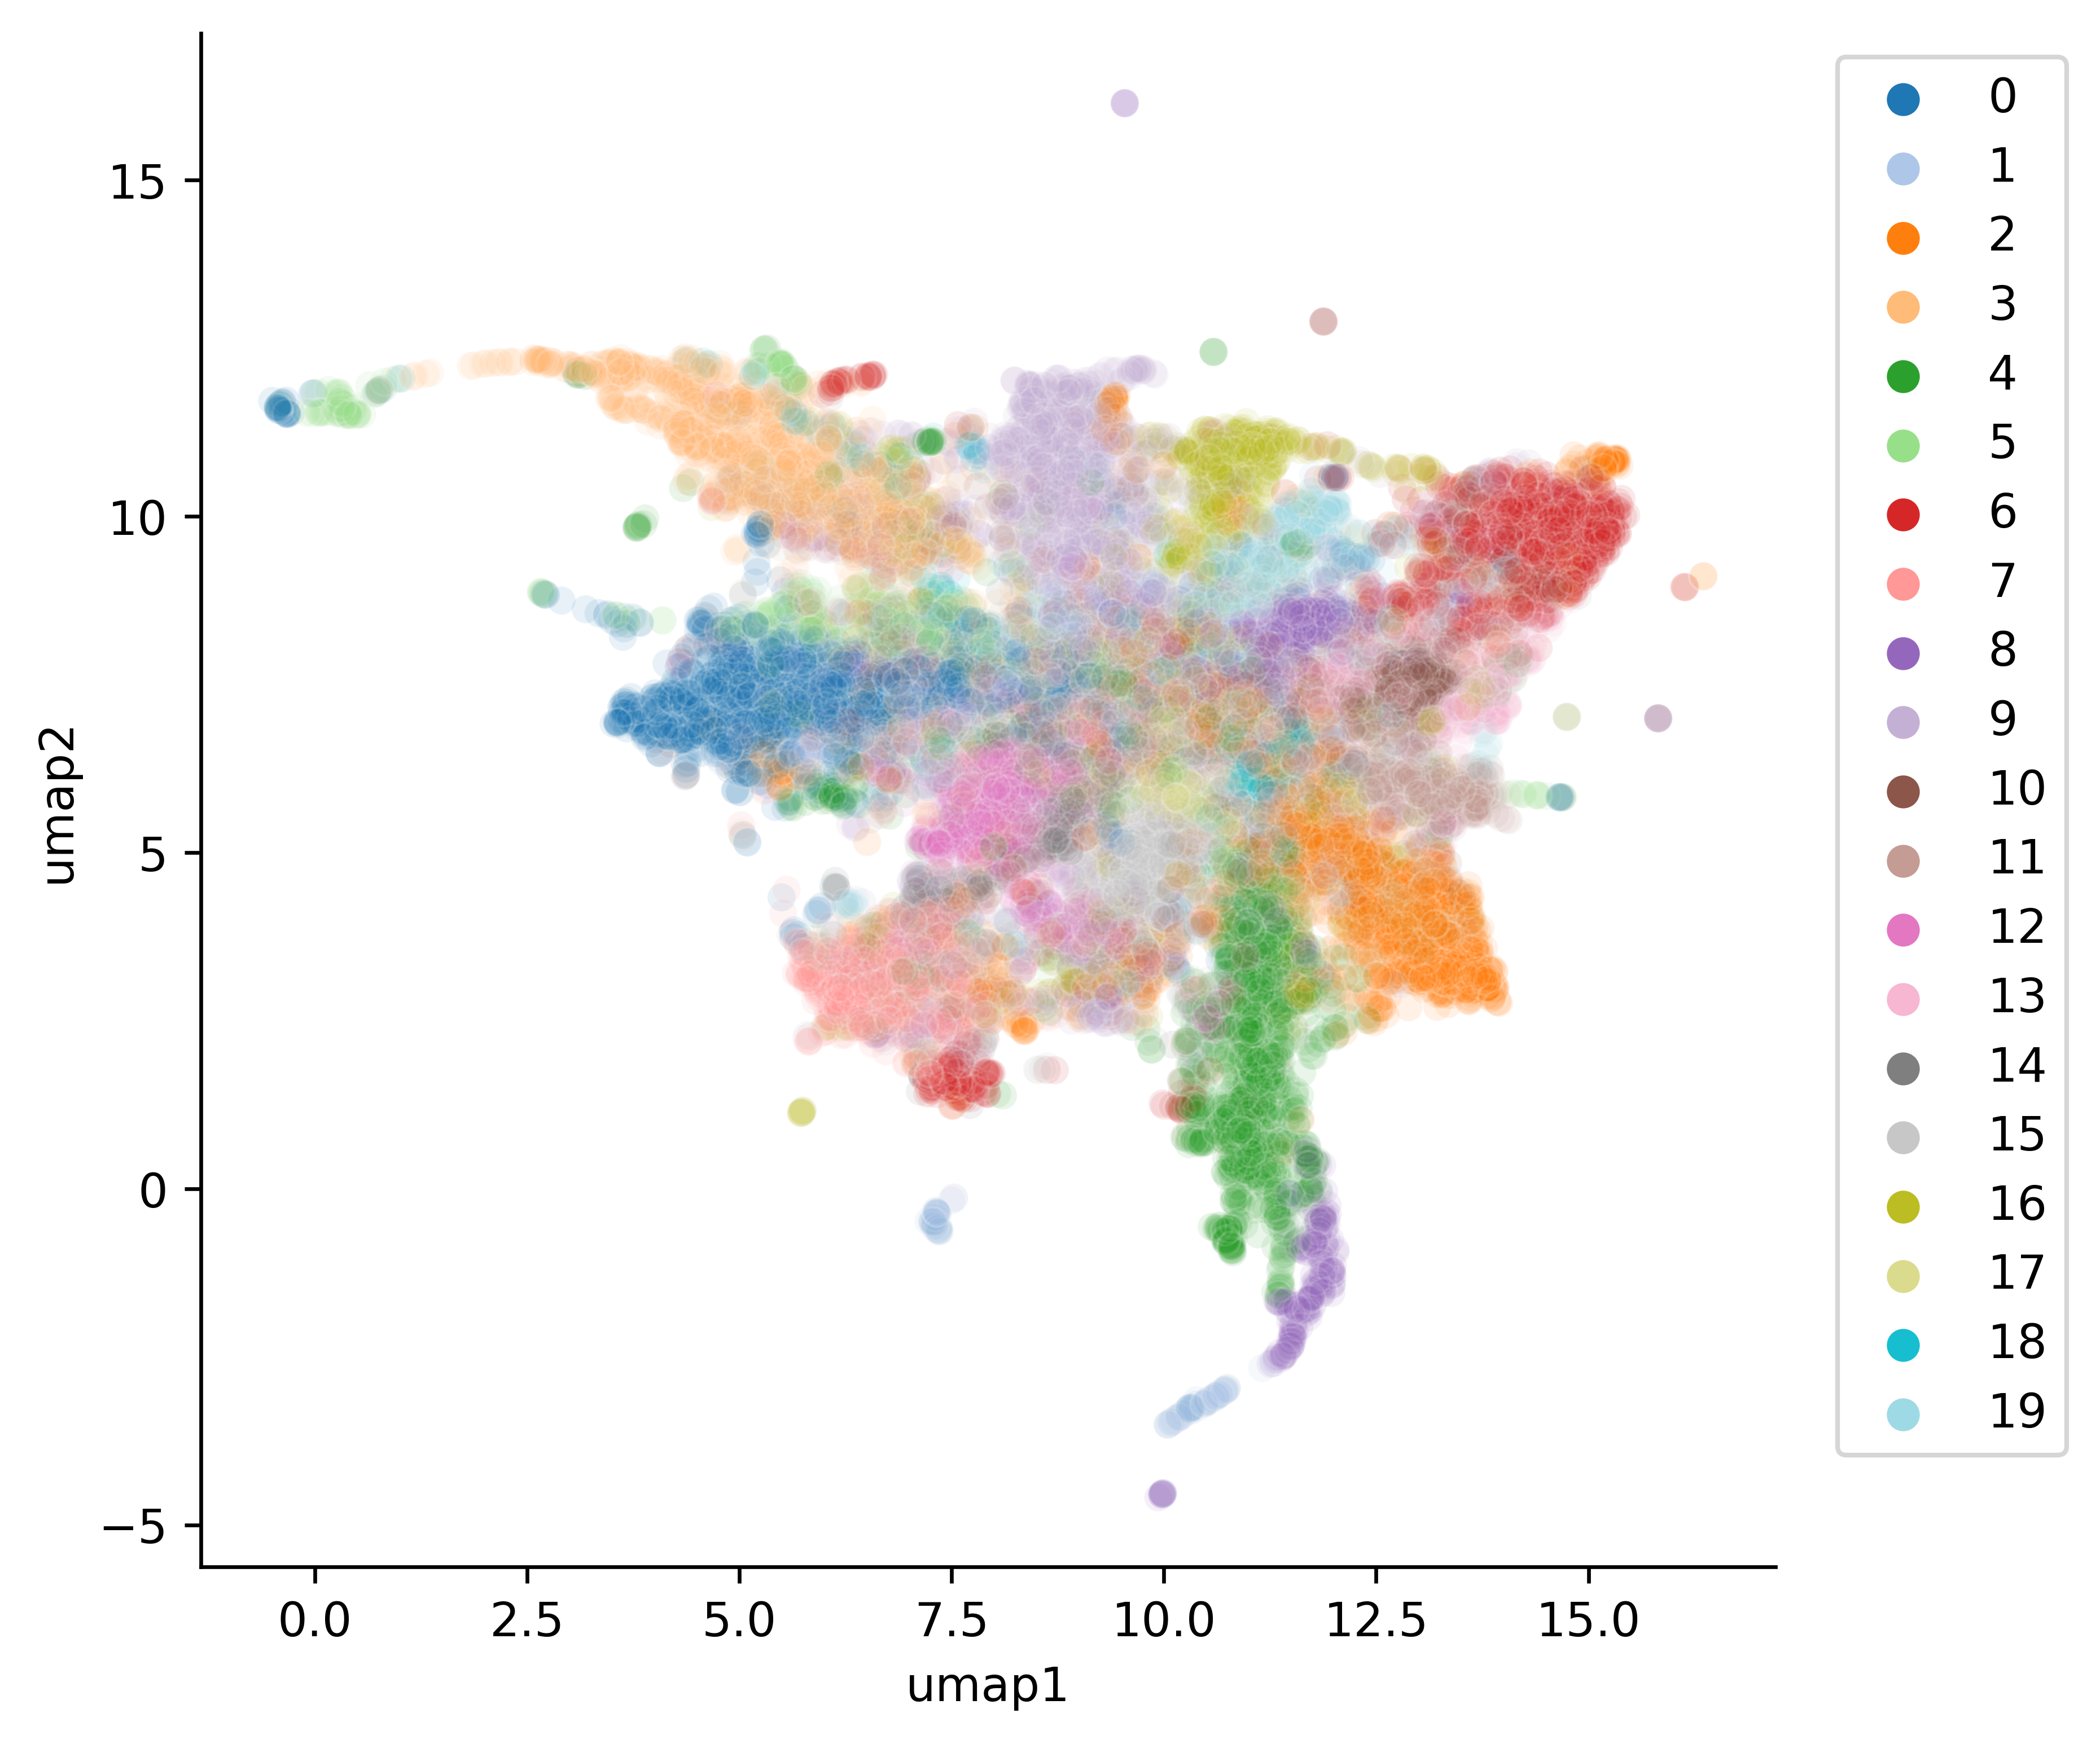

In [19]:
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False


fig = plt.figure(figsize = (6,6), dpi=600)

g = sns.scatterplot(data=umap_out, x = 'umap1', y = 'umap2',hue='primary_component', 
                palette='tab20', alpha= .1)
g.legend(bbox_to_anchor= (1.2,1))

plt.show()

## Single cell example

### Cell 1

In [23]:
cur_component = 0
componentF = pd.DataFrame(components.T)
componentF.sort_values(by=[cur_component],ascending=False).head(100)

0         1         2         3         4         5         6   \
9496   1.968458  0.000000  0.014334  0.326247  0.063648  2.134546  0.000000   
3135   1.958892  0.120458  0.000000  0.249534  0.027384  1.447657  0.012822   
2248   1.574980  0.038270  0.000000  0.224214  0.018592  1.389550  0.000000   
1850   1.102096  0.000000  0.034066  0.292567  0.013621  1.976852  0.000000   
14816  0.937104  0.080930  0.000000  0.115982  0.011578  0.664869  0.040631   
...         ...       ...       ...       ...       ...       ...       ...   
9026   0.139992  0.001871  0.027525  0.004553  0.040331  0.007917  0.004205   
7015   0.139592  0.008155  0.000539  0.025279  0.011308  0.162166  0.019151   
9021   0.138189  0.001394  0.018535  0.004624  0.041262  0.005012  0.004595   
9219   0.137359  0.000000  0.002137  0.046154  0.004773  0.301472  0.006769   
11180  0.136765  0.272719  0.010030  0.016501  0.022085  0.012860  0.027882   

             7         8         9         10        11        12        13  \
9496   0.122846  0.000711  0.113712  0.000000  0.000000  0.770243  0.000000   
3135   0.057581  0.004693  0.190234  0.023956  0.000000  0.491500  0.000000   
2248   0.051718  0.036324  0.132962  0.000000  0.000000  0.486082  0.000000   
1850   0.042632  0.042187  0.000000  0.000000  0.000000  0.748930  0.000000   
14816  0.025314  0.000000  0.091597  0.031034  0.000072  0.223527  0.010027   
...         ...       ...       ...       ...       ...       ...       ...   
9026   0.033275  0.012954  0.020174  0.002328  0.008968  0.003673  0.028971   
7015   0.016124  0.011718  0.008847  0.016557  0.000000  0.057872  0.012762   
9021   0.040045  0.012370  0.020984  0.001991  0.010289  0.001438  0.027491   
9219   0.006430  0.022364  0.000000  0.013040  0.000000  0.114363  0.005933   
11180  0.001010  0.101021  0.022638  0.057270  0.025649  0.041624  0.025755   

             14        15        16        17        18        19  
9496   0.168948  0.000000  0.141679  0.000000  0.165764  0.000000  
3135   0.227851  0.001573  0.022623  0.000000  0.144835  0.000000  
2248   0.166995  0.000000  0.060252  0.011989  0.120627  0.000000  
1850   0.096364  0.019426  0.195936  0.014144  0.154208  0.000466  
14816  0.109431  0.000000  0.005628  0.000000  0.067732  0.000000  
...         ...       ...       ...       ...       ...       ...  
9026   0.023543  0.015277  0.001339  0.003031  0.000057  0.014802  
7015   0.015390  0.015849  0.011610  0.006913  0.013663  0.007049  
9021   0.022808  0.018927  0.004596  0.005289  0.000001  0.012064  
9219   0.013311  0.015574  0.030706  0.006856  0.026436  0.012604  
11180  0.014418  0.000000  0.008708  0.020026  0.008599  0.000000  

[100 rows x 20 columns]

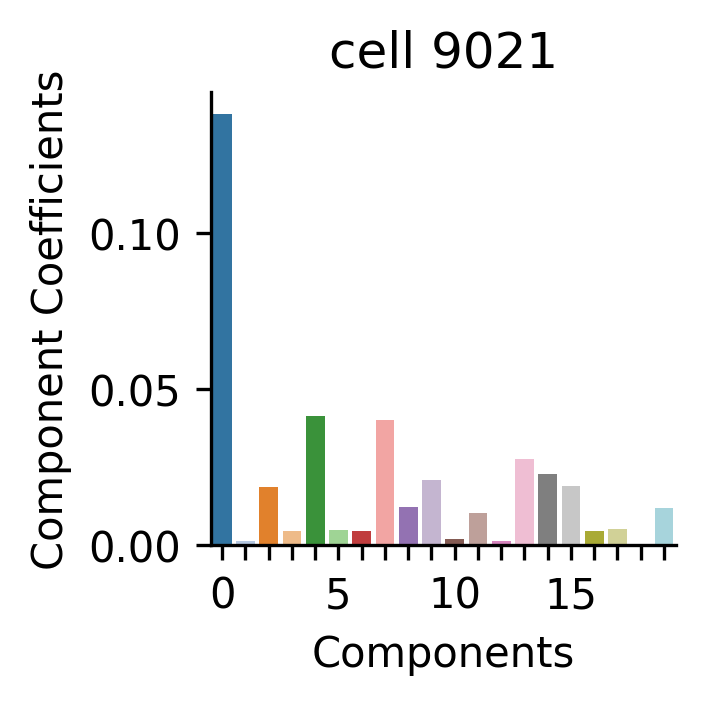

In [24]:
cell_no = 9021


figure(figsize=(2,2), dpi=300)

feature_imp = componentF.loc[cell_no]

ax = sns.barplot(x=feature_imp.index, y = feature_imp, palette="tab20", color = feature_imp)

for i, t in enumerate(ax.get_xticklabels()):
    if (i % 5) != 0:
        t.set_visible(False)
        
plt.xlabel('Components')
plt.ylabel('Component Coefficients')
plt.title(f"cell {cell_no}")
plt.show()

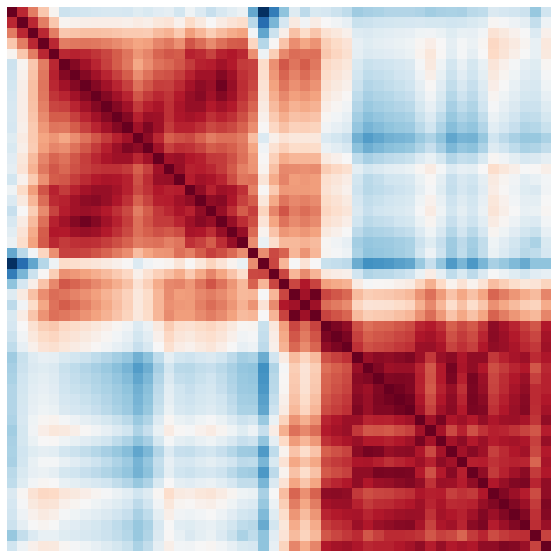

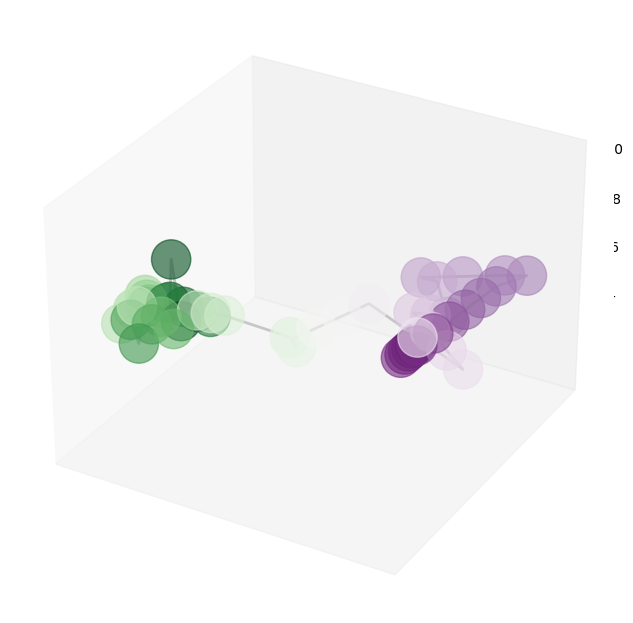

In [25]:
single_map = xyzfilt[cell_no]
ex_map = get_distance_matrix(single_map)

original = pd.DataFrame(single_map, columns=['x', 'y', 'z'])
normalized = normalize_map(get_distance_matrix(single_map), single_map, plot_maps=False)

plot_distance_matrix(get_distance_matrix(single_map), cmap_order = "forward",
                    hide_all=True, ax_label=None)

plot_in_3d(original, point_size=800)